In [2]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
from necro_uncal_new_updated import model as model100
from necro_uncal_new_10tnf import model as model10
# from necro_uncal_new_1tnf import model as model1
# from necro_uncal_new_01tnf import model as model01
import pandas as pd
# alias_model_components(model100, model10, model1, model01)
from scipy import stats
from pysb.simulator import SimulationResult

In [2]:
print(list(model100.initial_conditions))

[(TNF(brec=None), Parameter('TNF_0', 2326.0)), (TNFR(blig=None, brip=None, bDD=None), Parameter('TNFR_0', 4800.0)), (TRADD(brec=None, brip=None, state='unmod', bDD1=None, bDD2=None), Parameter('TRADD_0', 4696.0)), (RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=None, bMLKL=None, state='unmod'), Parameter('RIP1_0', 40000.0)), (TRAF(brip=None, bciap=None, bcyld=None, state='unmod'), Parameter('TRAF_0', 11776.0)), (cIAP(btraf=None), Parameter('cIAP_0', 9000.0)), (MLKL(bRHIM=None, state='unmod'), Parameter('MLKLa_0', 5544.0)), (A20(brip=None), Parameter('A20_0', 9000.0)), (CYLD(brip=None, btraf=None), Parameter('CYLD_0', 9000.0)), (FADD(bDD=None, bDED1=None, bDED2=None), Parameter('FADD_0', 3109.0)), (RIP3(bRHIM=None, bDD=None, state='unmod'), Parameter('RIP3_0', 10654.0)), (flip_L(bDED=None, state='A'), Parameter('flip_L_0', 3900.0)), (LUBAC(brip=None), Parameter('Lubac_0', 7226.0)), (C8(bf=None, flip=None, state='I'), Parameter('C8_0', 3799.0))]


In [3]:
print(list(model10.initial_conditions))

[(TNF(brec=None), Parameter('TNF_0', 233.0)), (TNFR(blig=None, brip=None, bDD=None), Parameter('TNFR_0', 4800.0)), (TRADD(brec=None, brip=None, state='unmod', bDD1=None, bDD2=None), Parameter('TRADD_0', 4696.0)), (RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=None, bMLKL=None, state='unmod'), Parameter('RIP1_0', 40000.0)), (TRAF(brip=None, bciap=None, bcyld=None, state='unmod'), Parameter('TRAF_0', 11776.0)), (cIAP(btraf=None), Parameter('cIAP_0', 9000.0)), (MLKL(bRHIM=None, state='unmod'), Parameter('MLKLa_0', 5544.0)), (A20(brip=None), Parameter('A20_0', 9000.0)), (CYLD(brip=None, btraf=None), Parameter('CYLD_0', 9000.0)), (FADD(bDD=None, bDED1=None, bDED2=None), Parameter('FADD_0', 3109.0)), (RIP3(bRHIM=None, bDD=None, state='unmod'), Parameter('RIP3_0', 10654.0)), (flip_L(bDED=None, state='A'), Parameter('flip_L_0', 3900.0)), (LUBAC(brip=None), Parameter('Lubac_0', 7226.0)), (C8(bf=None, flip=None, state='I'), Parameter('C8_0', 3799.0))]


In [6]:
par_files = np.load('most_likely_par_5k_necropydream_may62020.npy')
n_pars = len(par_files)
all_pars = np.zeros((n_pars, len(model100.parameters)))

rate_params = model100.parameters_rules() # these are only the parameters involved in the rules
param_values = np.array([p.value for p in model100.parameters]) # these are all the parameters
rate_mask = np.array([p in rate_params for p in model100.parameters])

for i in range(n_pars):
    par = par_files[i]
    param_values[rate_mask] = 10 ** par
    all_pars[i] = param_values
print(len(all_pars))    

5000


In [5]:
par_files = np.load('most_likely_par_5k_necropydream_may62020.npy')
n_pars = len(par_files)
all_pars2 = np.zeros((n_pars, len(model10.parameters)))

rate_params = model10.parameters_rules() # these are only the parameters involved in the rules
param_values = np.array([p.value for p in model10.parameters]) # these are all the parameters
rate_mask = np.array([p in rate_params for p in model10.parameters])

for i in range(n_pars):
    par = par_files[i]
    param_values[rate_mask] = 10 ** par
    all_pars2[i] = param_values
print(len(all_pars2)) 

5000


In [7]:
print('running simulations 100')
# t = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])

tspan = np.linspace(0, 1440, 300)
solver100 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
result100 = solver100.run(param_values=all_pars, num_processors = 10)
result100.save('BLAH2.h5',include_obs_exprs = True)
# df = result100.dataframe
# result10.save('necro_pydream_5chns_929_10tnf_updated_kocyld.h5')
# df1 = result100.dataframe

2020-05-13 02:58:59.553 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2020-05-13 02:58:59.562 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-13 02:58:59.627 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started


running simulations 100


2020-05-13 02:59:00.495 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes
2020-05-13 03:01:25.389 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-13 03:01:25.393 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-13 03:01:28.889 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [9]:
print('running simulations 100')
# t = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])

tspan = np.linspace(0, 1440, 300)
solver100n = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
result100n = solver100n.run(param_values=all_pars, num_processors = 10)
result100n.save('BLAHxcghjk.h5',include_obs_exprs = True)

2020-05-13 03:04:40.477 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2020-05-13 03:04:40.486 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-13 03:04:40.550 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started


running simulations 100


2020-05-13 03:04:41.420 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes
2020-05-13 03:07:10.338 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-13 03:07:10.339 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-13 03:07:13.672 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [10]:
br = SimulationResult.load('BLAHxcghjk.h5')

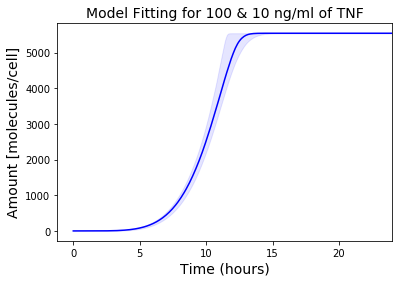

In [11]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([br.dataframe],
               keys=['wt'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue'}
#     ('MLKLa_obs', 'a20ko'): 'orange',
#     ('MLKLa_obs', 'cyldko'): 'red'
# }

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Model Fitting for 100 & 10 ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
# plt.errorbar(x1001/60, y1001*5544,
#              yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
#              (400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x101/60, y101*5544,
#              yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
#                     0.050022163974868*5544),
#              (400,400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x102/60, y102*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                 Line2D([0], [0], color='orange', lw=4),
#                 Line2D([0], [0], color='red', lw=4)]
# plt.legend(custom_lines, ['wt', 'a20ko', 'cyldko'], prop={'size': 10}, loc = 'best')
plt.show()

In [7]:
print('running simulations 10')
tspan = np.linspace(0, 1440, 300)
solver10 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
result10 = solver10.run(param_values=all_pars2, num_processors = 10)
result10.save('necro_pydream_5chns_5k_5620_10tnf.h5')
df2 = result10.dataframe
# df2 = result10.dataframe

2020-05-12 15:51:38.857 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-12 15:51:38.867 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-12 15:51:38.902 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started


running simulations 10


2020-05-12 15:51:39.324 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 10 processes
2020-05-12 15:52:53.367 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-12 15:52:53.368 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-12 15:52:54.842 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


In [ ]:
wt100 = SimulationResult.load('necro_pydream_5chns_5k_5620_100tnf.h5')
# df1 = wt100.dataframe

In [ ]:
wt10 = SimulationResult.load('necro_pydream_5chns_5k_5620_10tnf.h5')
# df2 = wt10.dataframe

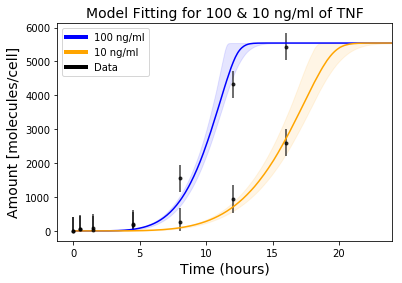

In [27]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([result100.dataframe, result10.dataframe],
               keys=['mlkl100', 'mlkl10'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'mlkl100'): 'blue',
    ('MLKLa_obs', 'mlkl10'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Model Fitting for 100 & 10 ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
plt.errorbar(x1001/60, y1001*5544,
             yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
             (400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x101/60, y101*5544,
             yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
                    0.050022163974868*5544),
             (400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x102/60, y102*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='black', lw=4)]
plt.legend(custom_lines, ['100 ng/ml', '10 ng/ml', 'Data'], prop={'size': 10}, loc = 'best')
plt.show()

In [ ]:
tspan = np.linspace(0, 1440, 300)
# x101 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x1001 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y1002 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])
# y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])

plt.figure()
for n in range(len(all_pars)):
    plt.plot(tspan/60, df1.loc[:]['MLKLa_obs'].iloc[:],lw=1.5, color ='green', label ='100 TNF',  zorder = 1, marker ='*', alpha = 0.30)
# plt.scatter(x1001/60, y1002*5544)
    plt.plot(tspan/60, df2.loc[:]['MLKLa_obs'].iloc[:],lw=1.5, color ='blue', label ='10 TNF',  zorder = 1, marker ='*', alpha = 0.30)
# plt.scatter(x101/60, y101*5544)

#     plt.errorbar(x100/60, y100*5544, yerr=210, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
plt.errorbar(x1001/60, y1001,
             yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
             (.10,.10,.10,.10)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002,
             yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
plt.title('pMLKL with 100 ng/ml of TNF', fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# custom_lines = [Line2D([0], [0], color='green', lw=4),
#                 Line2D([0], [0], color='blue', lw=4)]
# plt.legend(custom_lines, ['Flip_wt', 'Flip_ko'], prop={'size': 10}, loc = 'best')
# plt.savefig('pmlkl_100tnf_wdata_pydream_best10kpars_t.png',dpi=300)
# plt.ylim(ymin = -10, ymax =100)
# plt.legend(loc='best')
plt.show()

In [ ]:
plt.figure()
for n in range(25000):
    plt.plot(tspan/60, df1.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='green', label ='Flip_wt',  zorder = 1, marker ='*', alpha = 0.30)
    plt.plot(tspan/60, df5.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='blue', label ='Flip_ko', zorder = 1, marker ='*', alpha = 0.30)
plt.xlabel("Time (in hr)", fontsize=15)
plt.ylabel("Amount (normalized)", fontsize=15)
# plt.title('Flip vs Flip KO with 100 ng/ml of TNF', fontsize=15)
plt.xlim(xmin = 0, xmax = 24)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
custom_lines = [Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='blue', lw=4)]
plt.legend(custom_lines, ['Flip_wt', 'Flip_ko'], prop={'size': 10}, loc = 'best')
# plt.savefig('pmlkl_100tnf_wdata_pydream_best10kpars_t.png',dpi=300)
# plt.ylim(ymin = -10, ymax =100)
# plt.legend(loc='best')
plt.show()

In [ ]:
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 600, 720, 840, 960])
y1002 = np.array([0.2798939020159581, 0.510, .7797294067, 0.95,0.98])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480, 600, 720])
x102 = np.array([840, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,0.088128107774737, 0.17])
y102 = np.array([0.30055140114867, 0.47])
# err = 215,264,304,421,1766,3042,4533,5481,5759

# plt.figure()
# for n in range(10000):
#     plt.plot(tspan/60, df1.loc[n]['MLKLa_obs'].iloc[:]/5544,lw=1.5, color ='green',  zorder = 1, marker ='*', alpha = 0.30)
# #     plt.errorbar(x100/60, y100*5544, yerr=210, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
#     plt.errorbar(x1001/60, y1001,
#                  yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#                  (.10,.10,.10,.10)],
#                        fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
#     plt.errorbar(x1002/60, y1002,
#                  yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)

In [ ]:
# x101 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x1001 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y1002 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([wt100.dataframe, wt10.dataframe],
               keys=['mlkl100', 'mlkl10'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'mlkl100'): 'blue',
    ('MLKLa_obs', 'mlkl10'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
# plt.title('wgiubeiod',fontsize=14) # Title
# plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
# plt.xlabel('Time (hours)', fontsize = 14) # X label
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
plt.errorbar(x1001/60, y1001,
             yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
             (.10,.10,.10,.10)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002,
             yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
ax.legend(['pMLKL10', 'pMLKL100'])
# Add axis labels and title
ax.set(xlabel='time (s)', ylabel='Count', title=f'SSA plot for {model10.name}')
# fig.savefig("test.png")
plt.show()

In [28]:
import sys 
sys.path.append('..')
# sys.path.insert(0,'/home/ildefog/pydyno')
import pydyno
print(pydyno.__file__)
from pydyno.discretization.pysb_discretize import PysbDomPath
from pydyno.seqanalysis import SeqAnalysis
from pydyno.visualize_simulations import VisualizeSimulations
from pydyno.visualize_discretization import visualization_path, visualization_seq_paths
%matplotlib inline
import random
import h5py

/home/ildefog/miniconda3/envs/calibration/lib/python3.7/site-packages/pydyno/__init__.py


In [29]:
#11:24am
# random.seed(412873)
dp10 = PysbDomPath(model10,'necro_pydream_5chns_5k_5620_10tnf.h5')
signatures, paths = dp10.get_path_signatures(target='s36', type_analysis='production', 
                                             depth=15, dom_om=0.5)

In [30]:
signatures.dissimilarity_matrix(n_jobs=1)

array([[  0.,   0.,   0., ..., 598., 598., 598.],
       [  0.,   0.,   0., ..., 598., 598., 598.],
       [  0.,   0.,   0., ..., 598., 598., 598.],
       ...,
       [598., 598., 598., ...,   0.,   0.,   0.],
       [598., 598., 598., ...,   0.,   0.,   0.],
       [598., 598., 598., ...,   0.,   0.,   0.]])

In [31]:
#11:24am
# random.seed(412873)
dp100 = PysbDomPath(model100,'necro_pydream_5chns_5k_5620_100tnf.h5')
signatures100, paths100 = dp100.get_path_signatures(target='s36', type_analysis='production', 
                                             depth=15, dom_om=0.5)

In [32]:
signatures100.dissimilarity_matrix(n_jobs=1)

array([[  0., 550.,  22., ..., 544., 544., 544.],
       [550.,   0., 548., ..., 534., 544., 532.],
       [ 22., 548.,   0., ..., 556., 558., 548.],
       ...,
       [544., 534., 556., ...,   0.,  32.,  50.],
       [544., 544., 558., ...,  32.,   0.,  48.],
       [544., 532., 548., ...,  50.,  48.,   0.]])

In [35]:
signatures100.save('pydyno_signatures_5k_5620_100tnf_s36_d15_om05.h5')

In [36]:
signatures100.silhouette_score_spectral_range(range(2,20), n_jobs=1)

,num_clusters,cluster_silhouette
0,2,0.553688
1,3,0.743146
2,4,0.634219
3,5,0.385758
4,6,0.277507
5,7,0.271096
6,8,0.289359
7,9,0.257607
8,10,0.267016
9,11,0.248587


In [45]:
signatures100.spectral_clustering(3)

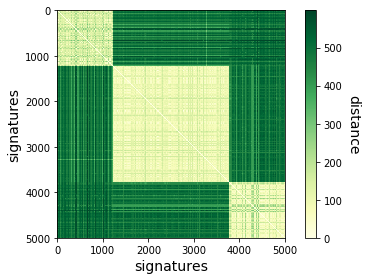

In [46]:
sorted_label_idxs = np.argsort(signatures100.labels)
sorted_diss = signatures100.diss[sorted_label_idxs, :]
sorted_diss = sorted_diss[:, sorted_label_idxs]
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.
    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """
    if not ax:
        ax = plt.gca()
    # Plot the heatmap
    im = ax.imshow(data, **kwargs)
    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")
#     # We want to show all ticks...
#     ax.set_xticks(np.arange(data.shape[1]))
#     ax.set_yticks(np.arange(data.shape[0]))
#     # ... and label them with the respective list entries.
#     ax.set_xticklabels(col_labels)
#     ax.set_yticklabels(row_labels)
#     # Let the horizontal axes labeling appear on top.
#     ax.tick_params(top=True, bottom=False,
#                    labeltop=True, labelbottom=False)
#     # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
#              rotation_mode="anchor")
#     # Turn spines off and create white grid.
#     for edge, spine in ax.spines.items():
#         spine.set_visible(False)
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
#     ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    return im, cbar
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
im, cbar = heatmap(sorted_diss, range(5000), range(5000), ax=ax,
                   cmap="YlGn", cbarlabel="distance")
ax.figure.axes[-1].yaxis.label.set_size(14)
plt.xlabel('signatures', fontsize = 14)
plt.ylabel('signatures', fontsize = 14)
fig.tight_layout()
plt.show()

<Figure size 1440x720 with 0 Axes>

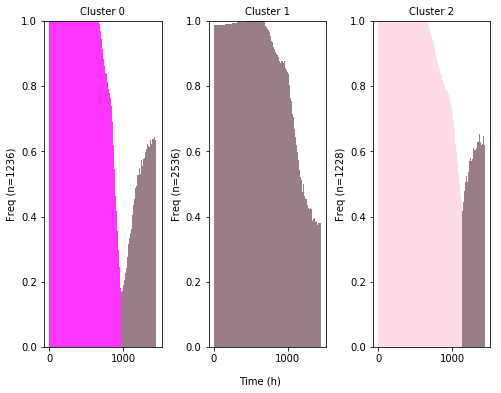

In [49]:
plt.figure(figsize = (20,10))
signatures100.plot_sequences(type_fig='modal')
plt.show()

In [50]:
vt = VisualizeSimulations(model100, sim_results='necro_pydream_5chns_5k_5620_100tnf.h5', 
                          clusters=signatures100.labels)

In [ ]:
vt.plot_cluster_dynamics(components=['MLKLa_obs'])

In [52]:
pmlkl = model100.monomers['MLKL']
vt.plot_pattern_sps_distribution(pattern=pmlkl(state='active'), type_fig='bar')
plt.show()

In [53]:
cluster_label_idxs = VisualizeSimulations.check_clusters_arg(signatures100.labels, nsims=5000)

In [75]:
pars_cluster_0 = result100.param_values[cluster_label_idxs[0]]
print(len(pars_cluster_0))

1236


In [59]:
rep_signatures=signatures100.seq_representativeness(method='centrality', clus_labels=signatures100.labels)

In [63]:
print(rep_signatures[0])

((2321, 1), array([ 3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3, 19, 19, 19, 19, 19,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6

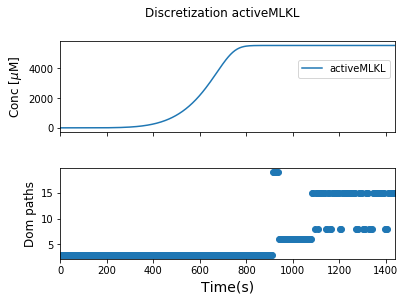

In [70]:
from pydyno.visualize_discretization import visualization_seq_paths
visualization_seq_paths(result100, 2321, signatures100)

In [79]:
visualization_path(model100, paths[3], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path3_5k_5620.png')
visualization_path(model100, paths[19], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path19_5k_5620.png')
visualization_path(model100, paths[6], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path6_5k_5620.png')
visualization_path(model100, paths[15], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path15_5k_5620.png')
visualization_path(model100, paths[8], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path8_5k_5620.png')

In [80]:
print('running simulations 100')
tspan = np.linspace(0, 1440, 300)
solver100 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
simclus0 = solver100.run(param_values=pars_cluster_0, num_processors = 10)
simclus0.save('pydyno_s36prod_5k_5620_100tnf_cluster0pars.h5')
# df2 = result10.dataframe
# df2 = result10.dataframe

2020-05-12 20:33:05.775 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2020-05-12 20:33:05.791 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-12 20:33:05.867 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started


running simulations 100


2020-05-12 20:33:05.999 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes
2020-05-12 20:33:34.544 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-12 20:33:34.545 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-12 20:33:35.017 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [84]:
print('running simulations 100')
tspan = np.linspace(0, 1440, 300)
solver100 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
simclus1 = solver100.run(param_values=pars_cluster_1, num_processors = 10)
simclus1.save('pydyno_s36prod_5k_5620_100tnf_cluster1pars.h5')
# df2 = result10.dataframe
# df2 = result10.dataframe

2020-05-12 20:38:53.996 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2020-05-12 20:38:54.002 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-12 20:38:54.034 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started


running simulations 100


2020-05-12 20:38:54.266 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes
2020-05-12 20:39:51.497 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-12 20:39:51.498 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-12 20:39:52.368 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [85]:
print('running simulations 100')
tspan = np.linspace(0, 1440, 300)
solver100 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
simclus2 = solver100.run(param_values=pars_cluster_2, num_processors = 10)
simclus2.save('pydyno_s36prod_5k_5620_100tnf_cluster2pars.h5')
# df2 = result10.dataframe
# df2 = result10.dataframe

2020-05-12 20:39:57.804 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2020-05-12 20:39:57.813 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-12 20:39:57.859 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2020-05-12 20:39:57.984 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes


running simulations 100


2020-05-12 20:40:27.944 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-12 20:40:27.945 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-12 20:40:28.374 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


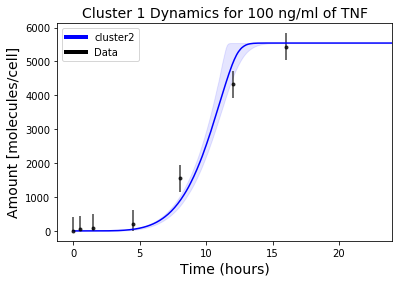

In [97]:
#FOR PLOTTING PERCENTILES 
x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([simclus1.dataframe],
               keys=['cluster2'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'cluster2'): 'blue'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Cluster 1 Dynamics for 100 ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
fig.savefig("pydyno_s36prod_5k_5620_100tnf_cluster2pars_wdata.pdf")
plt.errorbar(x1001/60, y1001*5544,
             yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
             (400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='black', lw=4)]
plt.legend(custom_lines, ['cluster2', 'Data'], prop={'size': 10}, loc = 'best')
plt.show()

In [ ]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([simclus0.dataframe, simclus1.dataframe, simclus2.dataframe],
               keys=['cluster0', 'cluster1', 'cluster2'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'cluster0'): 'blue',
    ('MLKLa_obs', 'cluster1'): 'green',
    ('MLKLa_obs', 'cluster2'): 'red'
}

lower_quantile = 0.0  # 10%
upper_quantile = 1.0  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour, marker='*')
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Cluster Dynamics for 100 ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')

plt.errorbar(x1001/60, y1001*5544,
             yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
             (400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x101/60, y101*5544,
#              yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
#                     0.050022163974868*5544),
#              (400,400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x102/60, y102*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='black', lw=4)]
plt.legend(custom_lines, ['cluster0', 'cluster1', 'cluster2', 'Data'], prop={'size': 10}, loc = 'best')
plt.show()

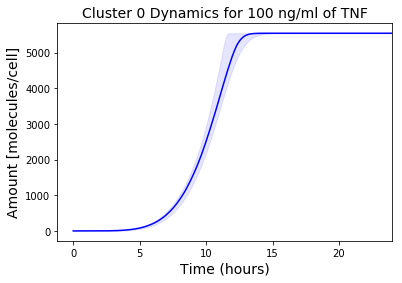

In [83]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([simclus0.dataframe],
               keys=['mlkl100'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'mlkl100'): 'blue'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Cluster 0 Dynamics for 100 ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
fig.savefig("pydyno_s36prod_5k_5620_100tnf_cluster0pars_wodata.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
# plt.errorbar(x1001/60, y1001*5544,
#              yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
#              (400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# # plt.errorbar(x101/60, y101*5544,
# #              yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
# #                     0.050022163974868*5544),
# #              (400,400,400,400,400)],
# #                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# # plt.errorbar(x102/60, y102*5544,
# #              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                 Line2D([0], [0], color='black', lw=4)]
# plt.legend(custom_lines, ['100 ng/ml', 'Data'], prop={'size': 10}, loc = 'best')
plt.show()

In [66]:
pars_cluster_1 = result100.param_values[cluster_label_idxs[1]]
print(len(pars_cluster_1))

2536


In [64]:
print(rep_signatures[1])

((2698, 1), array([15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,
       15, 15

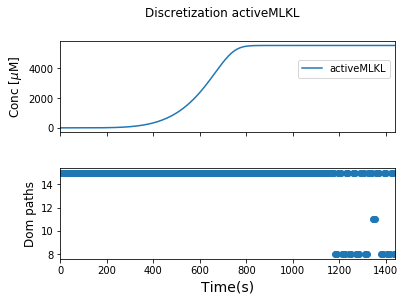

In [71]:
visualization_seq_paths(result100, 2698, signatures100)

In [ ]:
visualization_path(model100, paths[3], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path3_5k_5620.png')
visualization_path(model100, paths[19], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path19_5k_5620.png')
visualization_path(model100, paths[6], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path6_5k_5620.png')
visualization_path(model100, paths[15], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path15_5k_5620.png')
visualization_path(model100, paths[8], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path8_5k_5620.png')

In [67]:
pars_cluster_2 = result100.param_values[cluster_label_idxs[2]]
print(len(pars_cluster_2))

1228


In [65]:
from pydyno.visualize_discretization import visualization_path, visualization_seq_pathsprint(rep_signatures[2])

((2764, 1), array([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        8,  8

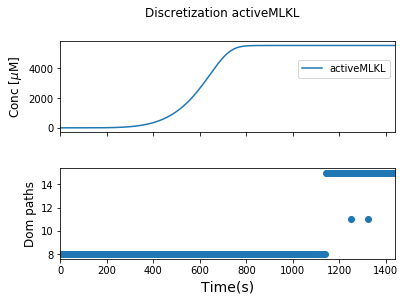

In [72]:
visualization_seq_paths(result100, 2764, signatures100)

In [ ]:
visualization_path(model100, paths[3], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path3_5k_5620.png')
visualization_path(model100, paths[19], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path19_5k_5620.png')
visualization_path(model100, paths[6], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path6_5k_5620.png')
visualization_path(model100, paths[15], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path15_5k_5620.png')
visualization_path(model100, paths[8], type_analysis='production', 
                   filename='cluster0100tnf_arrestin_s36_prod_05om_depth15_path8_5k_5620.png')

In [4]:
m = model100.components 

In [117]:
a20ko = [0]

print('running simulations 100')
tspan = np.linspace(0, 1440, 300)
solver100n = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
simclus2n = solver100n.run(initials = {m.A20(brip = None):a20ko},
                         param_values=pars_cluster_0, num_processors = 10)
# simclus2.save('pydyno_s36prod_5k_5620_100tnf_cluster0pars_a20ko.h5')
# df2 = result10.dataframe
# df2 = result10.dataframe

2020-05-13 02:28:07.062 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2020-05-13 02:28:07.071 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-13 02:28:07.137 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started


running simulations 100


2020-05-13 02:28:07.394 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes
2020-05-13 02:28:47.612 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-13 02:28:47.613 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-13 02:28:48.475 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [5]:
cyldko = [0]

print('running simulations 100')
tspan = np.linspace(0, 1440, 300)
solver100nnn = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
simclus2nnn = solver100nnn.run(initials = {m.CYLD(brip=None, btraf = None):cyldko},
                         param_values=pars_cluster_0, num_processors = 10)
simclus2nnn.save('BLAH.h5')
# df2 = result10.dataframe
# df2 = result10.dataframe

2020-05-13 02:58:33.283 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2020-05-13 02:58:33.296 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"


running simulations 100


NameError: name 'pars_cluster_0' is not defined

In [107]:
sim1 = SimulationResult.load('necro_pydream_5chns_5k_5620_100tnf.h5')
wt = sim1.dataframe
# a20ko = SimulationResult.load('pydyno_s36prod_5k_5620_100tnf_cluster0pars_a20ko.h5').dataframe
# cyldko = SimulationResult.load('pydyno_s36prod_5k_5620_100tnf_cluster0pars_cyldko.h5').dataframe

In [109]:
wt['MLKLa_obs'][:]

simulation  time       
0           0.000000       0.0
            4.816054       0.0
            9.632107       0.0
            14.448161      0.0
            19.264214      0.0
            24.080268      0.0
            28.896321      0.0
            33.712375      0.0
            38.528428      0.0
            43.344482      0.0
            48.160535      0.0
            52.976589      0.0
            57.792642      0.0
            62.608696      0.0
            67.424749      0.0
            72.240803      0.0
            77.056856      0.0
            81.872910      0.0
            86.688963      0.0
            91.505017      0.0
            96.321070      0.0
            101.137124     0.0
            105.953177     0.0
            110.769231     0.0
            115.585284     0.0
            120.401338     0.0
            125.217391     0.0
            130.033445     0.0
            134.849498     0.0
            139.665552     0.0
                          ... 
4999        130

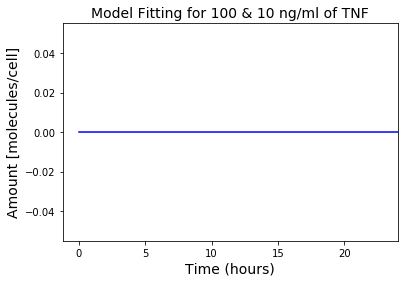

In [108]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([sim1.dataframe],
               keys=['wt'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue'}
#     ('MLKLa_obs', 'a20ko'): 'orange',
#     ('MLKLa_obs', 'cyldko'): 'red'
# }

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Model Fitting for 100 & 10 ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
# plt.errorbar(x1001/60, y1001*5544,
#              yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
#              (400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x101/60, y101*5544,
#              yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
#                     0.050022163974868*5544),
#              (400,400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x102/60, y102*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                 Line2D([0], [0], color='orange', lw=4),
#                 Line2D([0], [0], color='red', lw=4)]
# plt.legend(custom_lines, ['wt', 'a20ko', 'cyldko'], prop={'size': 10}, loc = 'best')
plt.show()

In [ ]:
a20ko = [0]
print('running simulations 100')
tspan = np.linspace(0, 1440, 300)
solver100 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
simclus2 = solver100.run(initials = {model100.components.A20(brip = None):a20ko},
                         param_values=pars_cluster_0, num_processors = 10)
simclus2.save('pydyno_s36prod_5k_5620_100tnf_cluster0pars_a20ko.h5')
# df2 = result10.dataframe
# df2 = result10.dataframe

In [110]:
print('running simulations 100')
# t = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
tspan = np.linspace(0, 1440, 300)
solver100n = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
result100n = solver100n.run(param_values=all_pars, num_processors = 10)
result100n.save('necro_pydream_5chns_5k_5620_100tnf_test.h5')
# df = result100.dataframe
# result10.save('necro_pydream_5chns_929_10tnf_updated_kocyld.h5')
# df1 = result100.dataframe

2020-05-13 02:16:43.871 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2020-05-13 02:16:43.880 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-13 02:16:43.946 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started


running simulations 100


2020-05-13 02:16:44.814 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes
2020-05-13 02:19:13.994 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-13 02:19:13.995 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-13 02:19:15.658 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [114]:
from pysb.core import ComponentSet, Model
from pysb.simulator import SimulationResult
import weakref
from contextlib import contextmanager

def _model_setstate_monkey_patch(self, state):
    """Monkey patch for Model.__setstate__ for restoring from older pickles"""

    # restore the 'model' weakrefs on all components
    self.__dict__.update(state)
    # Set "tags" attribute for older, pickled models
    self.__dict__.setdefault('tags', ComponentSet())
    for c in self.all_components():
        c.model = weakref.ref(self)

@contextmanager
def _patch_model_setstate():
    old_setstate = Model.__setstate__
    Model.__setstate__ = _model_setstate_monkey_patch
    try:
        yield
    finally:
        Model.__setstate__ = old_setstate

def simulation_result_load(filename, dataset_name=None, group_name=None):
    with _patch_model_setstate():
        return SimulationResult.load(filename, dataset_name, group_name)

In [115]:
simnn = simulation_result_load('necro_pydream_5chns_5k_5620_100tnf_test.h5')

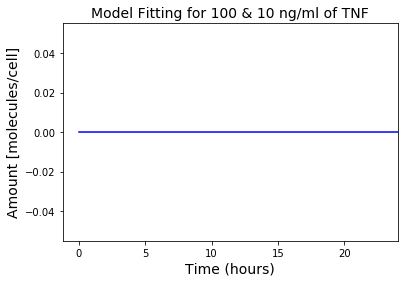

In [116]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([simnn.dataframe],
               keys=['wt'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue'}
#     ('MLKLa_obs', 'a20ko'): 'orange',
#     ('MLKLa_obs', 'cyldko'): 'red'
# }

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Model Fitting for 100 & 10 ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
# plt.errorbar(x1001/60, y1001*5544,
#              yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
#              (400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x101/60, y101*5544,
#              yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
#                     0.050022163974868*5544),
#              (400,400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x102/60, y102*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                 Line2D([0], [0], color='orange', lw=4),
#                 Line2D([0], [0], color='red', lw=4)]
# plt.legend(custom_lines, ['wt', 'a20ko', 'cyldko'], prop={'size': 10}, loc = 'best')
plt.show()

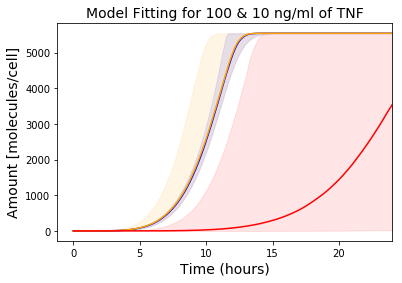

In [122]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([result100n.dataframe, simclus2n.dataframe, simclus2nn.dataframe],
               keys=['wt', 'a20ko', 'cyldko'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue',
    ('MLKLa_obs', 'a20ko'): 'orange',
    ('MLKLa_obs', 'cyldko'): 'red'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Model Fitting for 100 & 10 ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
# plt.errorbar(x1001/60, y1001*5544,
#              yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
#              (400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x101/60, y101*5544,
#              yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
#                     0.050022163974868*5544),
#              (400,400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x102/60, y102*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# custom_lines = [Line2D([0], [0], color='blue', lw=4),
#                 Line2D([0], [0], color='orange', lw=4),
#                 Line2D([0], [0], color='red', lw=4)]
# plt.legend(custom_lines, ['wt', 'a20ko', 'cyldko'], prop={'size': 10}, loc = 'best')
plt.show()